In [1]:
import numpy as np
import matplotlib.pyplot as plot
import seaborn

%matplotlib inline

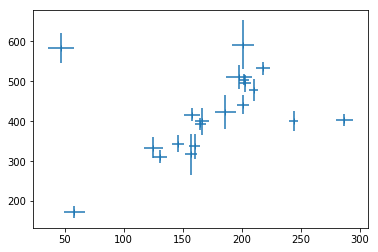

In [2]:
hoggData = np.loadtxt("hoggData.dat", dtype=np.float64, delimiter=',')

x = hoggData[:,1]
y = hoggData[:,2]
sigY = hoggData[:,3]
sigX = hoggData[:,4]
rhoXY = hoggData[:,5]

plot.errorbar(x, y, sigY, sigX, fmt='|')

plotx = np.linspace(0,300,2000)

# Section 1 - Standard Practice

### Exercise 1: 
Using the standard linear algebra method of this Section, fit the straight line $y = m x + b$ to the $x$, $y$, and $\sigma_y$ values for data points $5$ through 20 in Table 1 on page 6. That is, ignore the first four data points, and also ignore the columns for σx and ρxy. Make a plot showing the points, their uncertainties, and the best-fit line. Your plot should end up looking like Figure 1. 

What is the standard uncertainty variance $\sigma^2_m$ on the slope of the line?

In [3]:
Y = y[5:]
A = np.column_stack((np.ones_like(Y), x[5:]))
C = np.diag(sigY[5:])

ACA = np.dot(A.T, np.dot(np.linalg.inv(C), A))
ACY = np.dot(A.T, np.linalg.solve(C,Y))

X = np.linalg.solve(ACA, ACY)

b, m = X

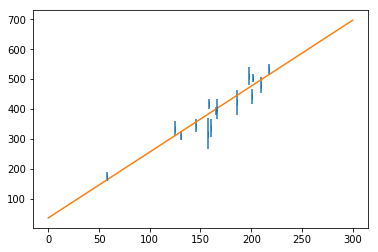

In [4]:
plot.errorbar(x[5:], y[5:], sigY[5:], fmt='|')

plot.plot(plotx, b + m*plotx)

In [5]:
print(fr"The standard uncertainty on m is {np.sqrt(ACA[1,1])}")

The standard uncertainty on m is 140.52258882975588


### Exercise 2
Repeat Exercise 1 but for all the data points in Table 1 on page 6. Your plot should end up looking like Figure 2. What is the standard uncertainty variance $\sigma^2_m$ on the slope of the line? Is there anything you don’t
like about the result? Is there anything different about the new points you have included beyond those used in Exercise 1?

In [6]:
Y = y
A = np.column_stack((np.ones_like(Y), x))
C = np.diag(sigY)

ACA = np.dot(A.T, np.dot(np.linalg.inv(C), A))
ACY = np.dot(A.T, np.linalg.solve(C,Y))

X = np.linalg.solve(ACA, ACY)

b, m = X

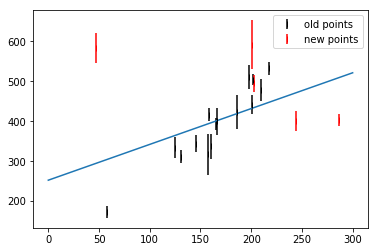

In [7]:
plot.errorbar(x[5:], y[5:], sigY[5:], fmt='|', color='k', label='old points')
plot.errorbar(x[:5], y[:5], sigY[:5], fmt='|', color='r', label='new points')

plot.plot(plotx, b + m*plotx)

plot.legend()

In [8]:
print(fr"The standard uncertainty on m is {np.sqrt(ACA[1,1])}")

The standard uncertainty on m is 174.07492934300973


### Exercise 3
Generalize the method of this Section to fit a general quadratic (second order) relationship. Add another column to matrix A containing the values $x_i^2$, and another element to vector $X$ (call it $q$). Then re-do Exercise 1
but fitting for and plotting the best quadratic relationship
$$ g(x) = q x^2 + m x + b . $$
Your plot should end up looking like Figure 3.

In [9]:
Y = y[5:]
A = np.column_stack((np.ones_like(Y), x[5:], x[5:]**2))
C = np.diag(sigY[5:])

ACA = np.dot(A.T, np.dot(np.linalg.inv(C), A))
ACY = np.dot(A.T, np.linalg.solve(C,Y))

X = np.linalg.solve(ACA, ACY)

b, m, q = X

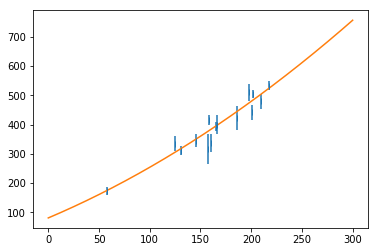

In [10]:
plot.errorbar(x[5:], y[5:], sigY[5:], fmt='|')

plot.plot(plotx, b + m*plotx + q*(plotx**2))

# Section 2 - The Objective Function

### Exercise 4
Imagine a set of $N$ measurements $t_i$, with uncertainty variances $\sigma^2_{t_i}$, all of the same (unknown) quantity $T$. Assuming the generative model that each $t_i$ differs from $T$ by a Gaussian-distributed offset, taken from a Gaussian with zero mean and variance $\sigma^2_{t_i}$, write down an expression for
the log likelihood $\ln{\mathcal{L}}$ for the data given the model parameter $T$. 

Take a derivative and show that the maximum likelihood value for $T$ is the usual
weighted mean.

The Gaussian log-likelihood in this case is

$$ \ln{\mathcal{L}(t_i, \sigma_t | T)} = -\frac{N}{2}\ln(2\pi) - \frac{N}{2}\ln{\sigma_{t_i}^2} - \sum_{i=1}^N \frac{(t_i - T)^2}{2\sigma_{t_i}^2} $$

The derivative of this likelihood is

$$ \frac{\partial \ln{\mathcal{L(t_i, \sigma_t | T)}}}{\partial T}  = -\frac{\partial}{\partial T} \sum_{i=1}^N \frac{(t_i - T)^2}{{2\sigma_{t_i}^2}} = \sum_{i=1}^N \frac{(t_i - T)}{\sigma_{t_i}^2} $$

This takes its maximum when the derivative is $0$

$$ \sum_{i=1}^N \frac{(t_i - T)}{\sigma_{t_i}^2} = 0 = \sum_{i=1}^N \frac{t_i}{\sigma_{t_i}^2} -T\sum_{i=1}^N \frac{1}{\sigma_{t_i}^2} $$

So, rearranging, we get the weighted mean as expected

$$ \hat{T} =  \frac{\sum_{i=1}^N \frac{t_i}{\sigma_{t_i}^2}}{\sum_{i=1}^N \frac{1}{\sigma_{t_i}^2}} $$

### Exercise 5
Take the matrix formulation for $\chi^2$ given in equation (7) and take derivatives to show that the minimum is at the matrix location given in equation (5).

Equation 7 is
$$\chi^2 = [Y-AX]^TC^{-1}[Y-AX] $$
By the product rule, we have
$$ \frac{\partial}{\partial X} \chi^2 = \left(\frac{\partial}{\partial X}[Y-AX]^T\right)C^{-1}[Y-AX] + [Y-AX]^T\left(\frac{\partial}{\partial X} C^{-1}[Y-AX]\right) $$
Differentiating, we get
$$ \frac{\partial}{\partial X} \chi^2 = -A^TC^{-1}[Y-AX] [Y-AX]^TC^{-1}[-A] $$
Multiplying out
$$ \frac{\partial}{\partial X} \chi^2 = -A^TC^{-1}Y + A^TC^{-1}AX - Y^TC^{-1}A + [AX]^TC^{-1}A $$
Since $-A^TC^{-1}Y$ is a scalar, it equals its own transpose
$$ \frac{\partial}{\partial X} \chi^2 = -2A^TC^{-1}Y + A^TC^{-1}AX + X^TA^TC^{-1}A $$
The two terms in X are also simply transposes of one another, and can thus be trivially added together
$$ \frac{\partial}{\partial X} \chi^2 = -2A^TC^{-1}Y + 2 A^TC^{-1}AX $$
$X$ takes its maximum likelihood value when the derivative is $0$
$$ -2A^TC^{-1}Y + 2 A^TC^{-1}A\hat{X} = 0 $$
Rearranging
$$ A^TC^{-1}A\hat{X} = 2A^TC^{-1}Y $$
And so
$$ \hat{X} = \left(A^TC^{-1}A\right)^{-1}A^TC^{-1}Y $$
As given in equation 5

# Section 3 - Pruning Outliers

### Exercise 6
 Using the mixture model proposed above—that treats the distribution as a mixture of a thin line containing a fraction $[1−P_b]$ of the points and a broader Gaussian containing a fraction $P_b$ of the points—find the bestfit
(the maximum a posteriori) straight line $y = m x + b$ for the $x$, $y$, and $\sigma_y$ for the data in Table 1 on page 6. Before choosing the MAP line, marginalize over parameters (Pb, Yb, Vb). That is, if you take a sampling approach, this means sampling the full five-dimensional parameter space but then choosing the peak value in the histogram of samples in the two-dimensional parameter space (m, b). Make one plot showing this two-dimensional histogram, and another showing the points, their uncertainties, and the MAP line. 

How does this compare to the standard result you obtained in Exercise 2? Do you like the MAP line better or worse? 
For extra credit, plot a sampling of 10 lines drawn from the marginalized posterior distribution for $(m, b)$ (marginalized over $P_b$, $Y_b$, $V_b$) and plot the samples as a set of light grey or transparent lines. Your plot should look like Figure 4.

Our likelihood function here is

$$ \mathcal{L} = \prod_{i=1}^N \left[\frac{1-P_b}{\sqrt{2\pi \sigma^2_{y_i}}}\exp\left(-\frac{[y_i -mx_i -b]^2}{2\sigma^2_{y_i}}\right) + \frac{P_b}{\sqrt{2\pi V_b}}\exp\left(-\frac{[y_i - Y_b]^2}{2V_b}\right) \right] $$

Which combines normal gaussian likelihoods, combined in a particular way

In [11]:
# def gauss_ln_like(mu, var, data):
#     """
#     Gaussian log-likelihood function.
#     """

#     n_data = 1

#     t1 = -0.5*n_data*np.log(2.*np.pi)

#     t2 = -0.5 * np.sum(np.log(var))

#     t3 = -0.5 * np.sum(((data-mu)**2)/var)

#     return t1 + t2 + t3

def gauss_ln_like(mu, var, data):
    """
    Gaussian log-likelihood function.
    """

    n_data = len(data)

    t1 = -0.5*n_data*np.log(2.*np.pi)

    t2 = -0.5 * np.sum(np.log(var))

    t3 = -0.5 * np.sum(((data-mu)**2)/var)

    return t1 + t2 + t3

In [12]:
from scipy.special import logsumexp

In [13]:
# def outlier_posterior(theta):
#     """
#     The posterior given in equation 17 of the paper. Written as taking one tuple of all the params, 
#     for ease of use with the stochastic sampler later
#     """
    
#     # get the params
#     m, b, pb, yb, vb = theta['m'], theta['b'], theta['pb'], theta['yb'], np.exp(theta['logvb'])
    
#     tot = 0
#     for dx,dy,dv in zip(x,y,sigY**2):
        
#         term1 = np.log(1-pb) + gauss_ln_like(m*dx + b, dv, dy)
#         term2 = np.log(pb) + gauss_ln_like(yb, vb, dy)
        
#         tot += logsumexp([term1, term2])

#     return tot

def outlier_posterior(theta):
    """
    The posterior given in equation 17 of the paper. Written as taking one tuple of all the params, 
    for ease of use with the stochastic sampler later
    """
    
    # get the params
    m, b, pb, yb, vb = theta['m'], theta['b'], theta['pb'], theta['yb'], np.exp(theta['logvb'])
    
    # the linear model prediction
    fgMean = b + m*x
    fgVar = sigY**2
    
    # the background model
    bgMean = yb
    bgVar = vb
    
    fgLike = gauss_ln_like(fgMean, fgVar, y) + np.log(1.-pb)
    bgLike = gauss_ln_like(bgMean, bgVar, y) + np.log(pb)

    lnlikes = np.column_stack((fgLike, bgLike))

    ll = np.sum(logsumexp(lnlikes, axis=1))

    return ll



We'll use the `cpnest` nested sampling code for this problem, which can be installed via `pip install cpnest`, or the repo can be found here; https://github.com/johnveitch/cpnest

In [14]:
import cpnest
import cpnest.model

In [15]:
class hogg_outlier_model(cpnest.model.Model):
    
    names = ['m', 'b', 'pb', 'yb', 'logvb']
    bounds = [[-6,6], [-100,300], [0,1], [0,1000], [0.,30]]
    
    @staticmethod
    def log_likelihood(theta):
        return outlier_posterior(theta)
    
# class hogg_outlier_model(cpnest.model.Model):
    
#     names = ['m', 'b']
#     bounds = [[-100,100], [-100,300]]
    
#     @staticmethod
#     def log_likelihood(theta):
#         return outlier_posterior(theta)

In [16]:
worker = cpnest.CPNest(hogg_outlier_model(), nlive=512, verbose=0)
worker.run()
posterior_samples = worker.get_posterior_samples()

Running with 4 parallel threads


Sampler process 18865: MCMC samples accumulated = 0
Sampler process 18866: MCMC samples accumulated = 0
Sampler process 18867: MCMC samples accumulated = 0
Sampler process 18868: MCMC samples accumulated = 0
Sampler process 18865 - mean acceptance 0.197: exiting
Sampler process 18867 - mean acceptance 0.200: exiting
Sampler process 18868 - mean acceptance 0.212: exiting
Sampler process 18866 - mean acceptance 0.221: exiting


Final evidence: -28.37
Information: 1.62


In [17]:
from corner import corner

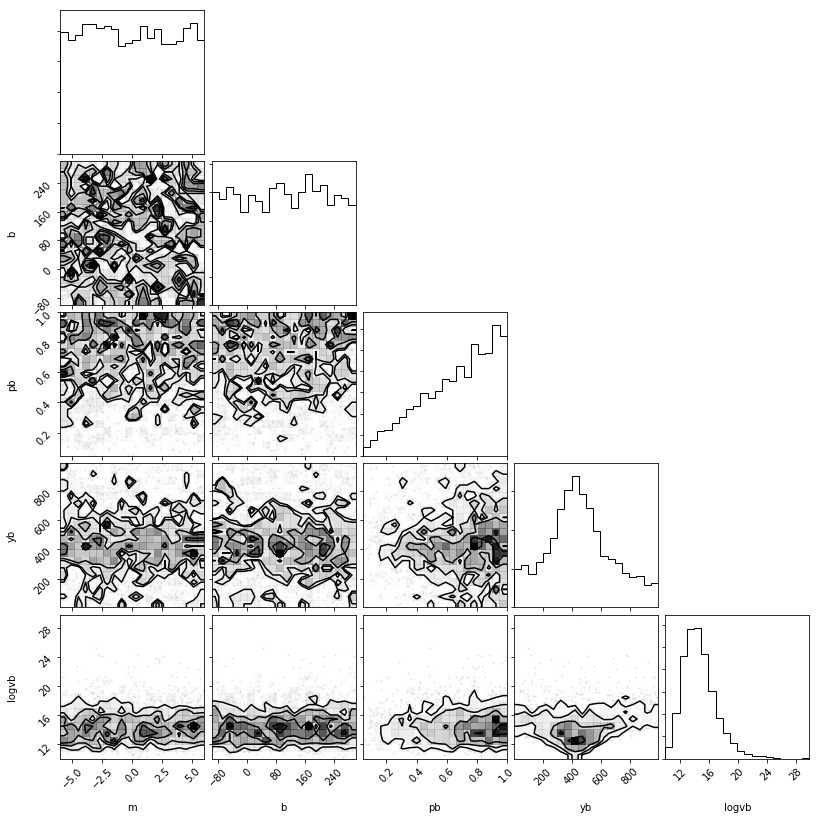

In [18]:
posts = []
names = ['m', 'b', 'pb', 'yb', 'logvb']
for n in names:
    posts.append(posterior_samples[n])
posts = np.array(posts).T

corner(posts, labels=names);

In [19]:
posts

array([[-4.50928806e-01,  2.93358585e+00,  5.09225675e-01,
         4.53922124e+02,  2.98355836e+01],
       [-3.05247578e+00,  4.22906046e+01,  4.89815891e-01,
         1.00857485e+02,  2.51861752e+01],
       [ 2.20047688e+00, -9.26029976e+01,  2.84140691e-01,
         3.69775878e+02,  2.32550033e+01],
       ...,
       [ 4.13432219e+00, -2.56331017e+01,  9.31106023e-01,
         4.25746012e+02,  1.22609636e+01],
       [-2.88739869e+00,  1.88250091e+02,  9.77771704e-01,
         4.03948084e+02,  1.25649988e+01],
       [-5.76356512e+00,  2.07269796e+02,  9.58477020e-01,
         4.26321706e+02,  1.23588851e+01]])

In [20]:
posts = posts[posts[:,0] < 4]